# <p style="text-align: center;">Grow Intern</p>
# <p style="text-align: center;">Author : <b>Tajeddine Bourhim</b></p>
## <p style="text-align: center;">Task 1 : <b>📊 Stock Price Prediction</b></p>

## Importing necessary libraries

In [ ]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Setting the date range for the stock data

In [2]:
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

## Downloading Apple stock data using yfinance

In [3]:
stock = "AAPL"
apple_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


## Displaying the first few rows of the data

In [4]:
apple_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-16,0.553571,0.566429,0.547143,0.549643,0.464160,435674400
2004-08-17,0.546071,0.555893,0.541964,0.551250,0.465517,323019200
2004-08-18,0.544821,0.568750,0.544464,0.566786,0.478637,364655200
2004-08-19,0.562679,0.568929,0.542143,0.548393,0.463104,388920000
2004-08-20,0.548393,0.553393,0.544464,0.550000,0.464462,316780800


## Checking the shape of the data (rows, columns)

In [5]:
apple_data.shape

(5033, 6)

## Describing the statistics of the data

In [6]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,48.777997,49.303899,48.276794,48.811372,47.090946,3.972869e+08
std,58.504529,59.145432,57.918935,58.559289,58.485191,3.990494e+08
min,0.544821,0.553393,0.541964,0.548393,0.463104,2.404830e+07
25%,6.666786,6.721429,6.547500,6.646429,5.612745,1.048186e+08
50%,23.855000,24.117500,23.637501,23.847500,21.307550,2.511012e+08
75%,55.060001,55.660000,54.357498,55.162498,52.910770,5.711580e+08
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.372970e+09


## Getting information about the data types and memory usage

In [7]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-08-16 to 2024-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


## Checking for missing values in the data

In [8]:
apple_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Enabling inline plotting in Jupyter notebooks

In [9]:
%matplotlib inline

## Plotting the adjusted closing price of Apple stock

Text(0.5, 1.0, 'Closing price of apple data')

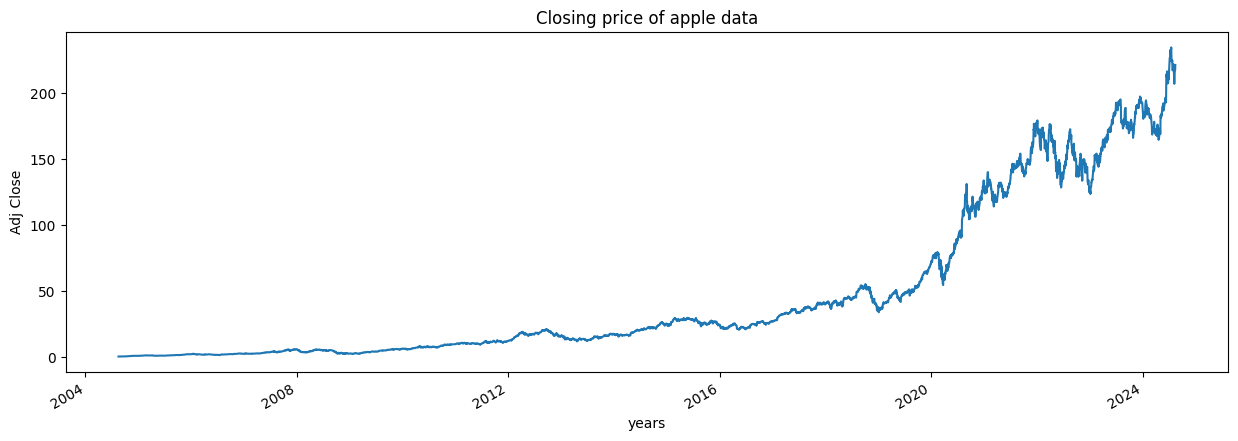

In [10]:
plt.figure(figsize = (15,5))
apple_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of apple data")

## Defining a function to plot any column from the data

In [11]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of apple data")

## Displaying all column names of the data

In [12]:
apple_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## Plotting each column in the data

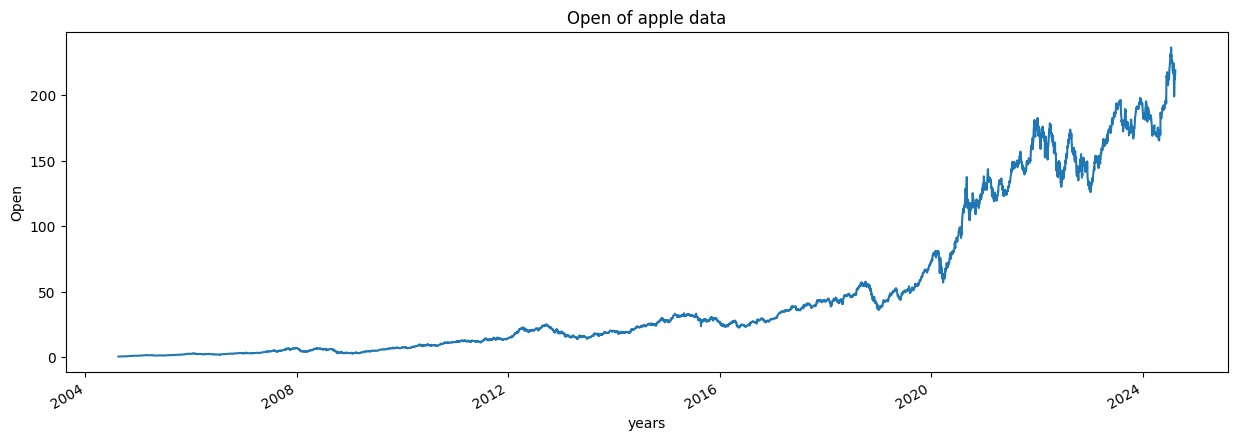

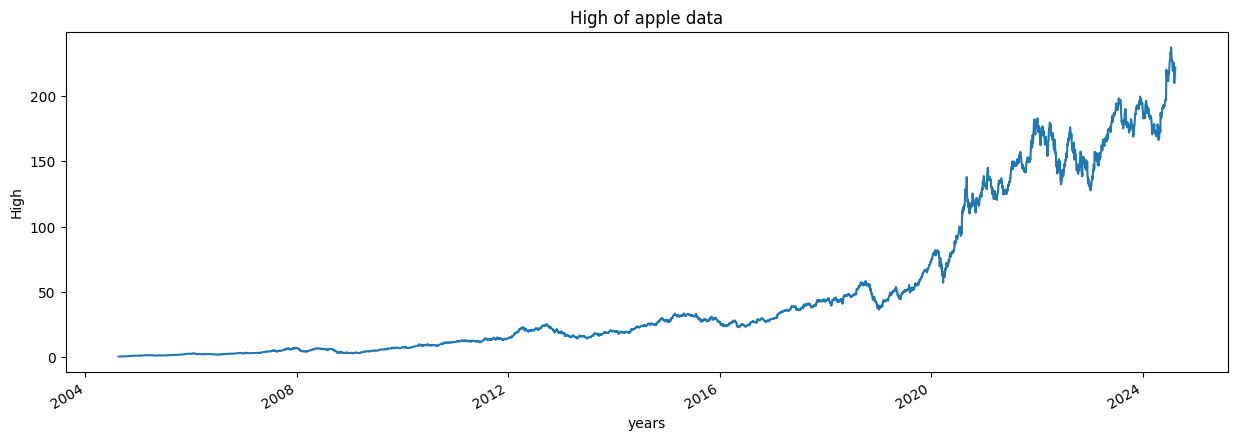

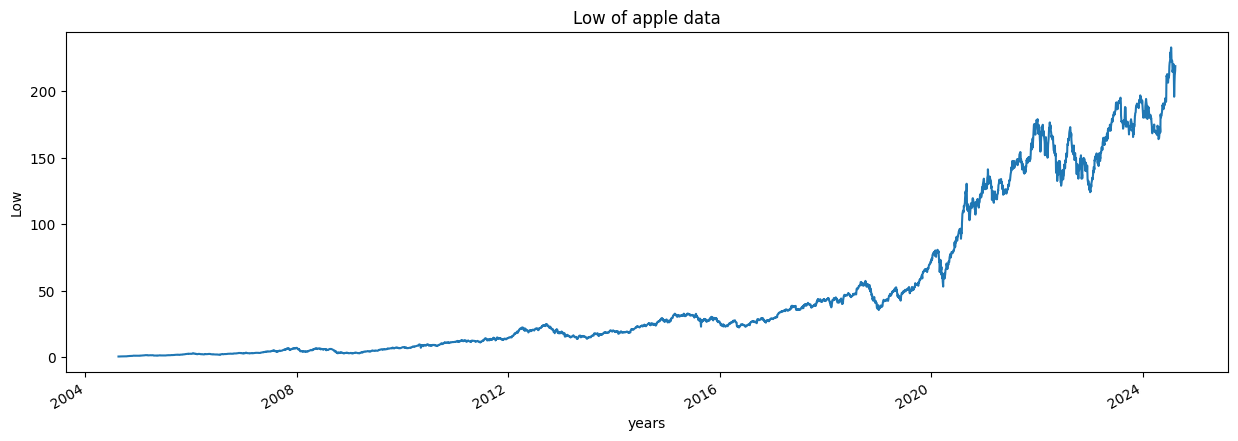

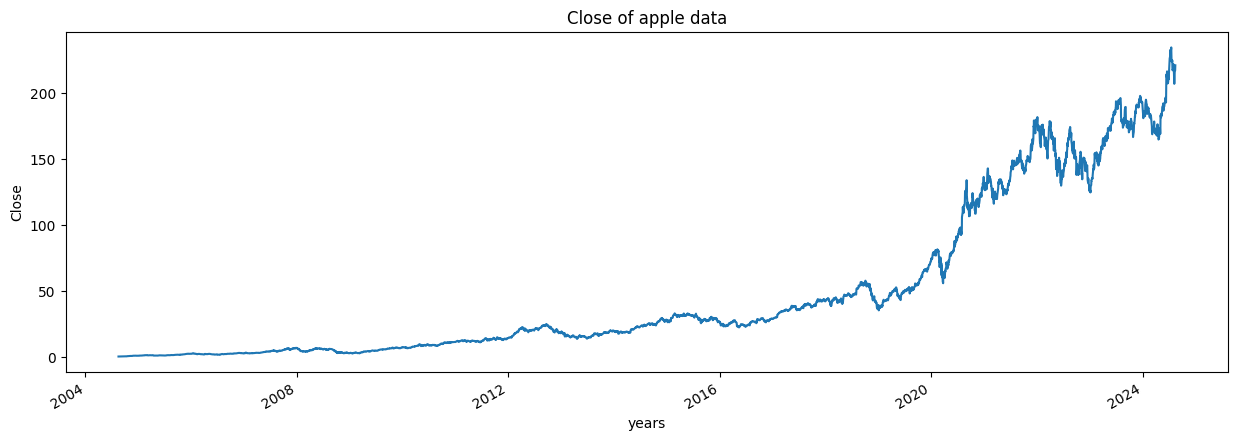

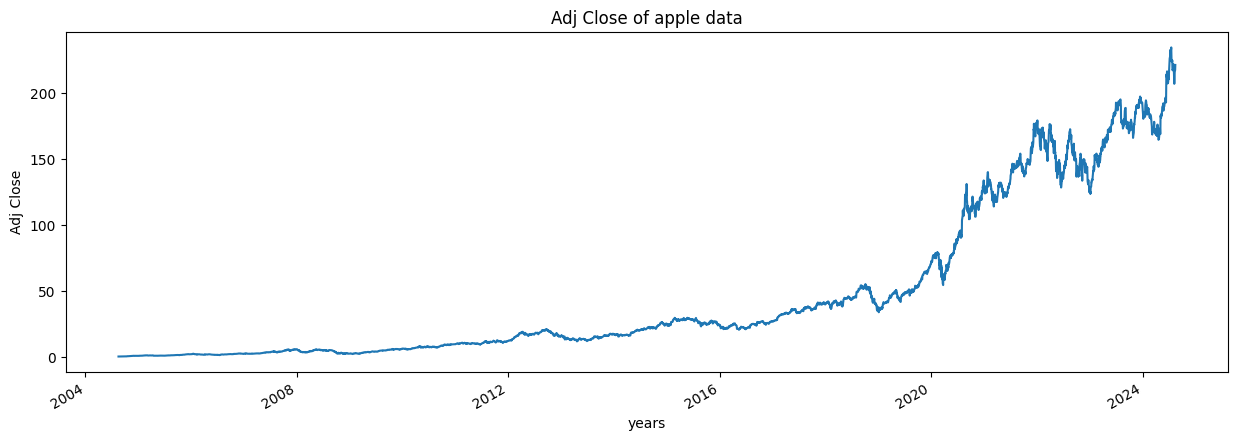

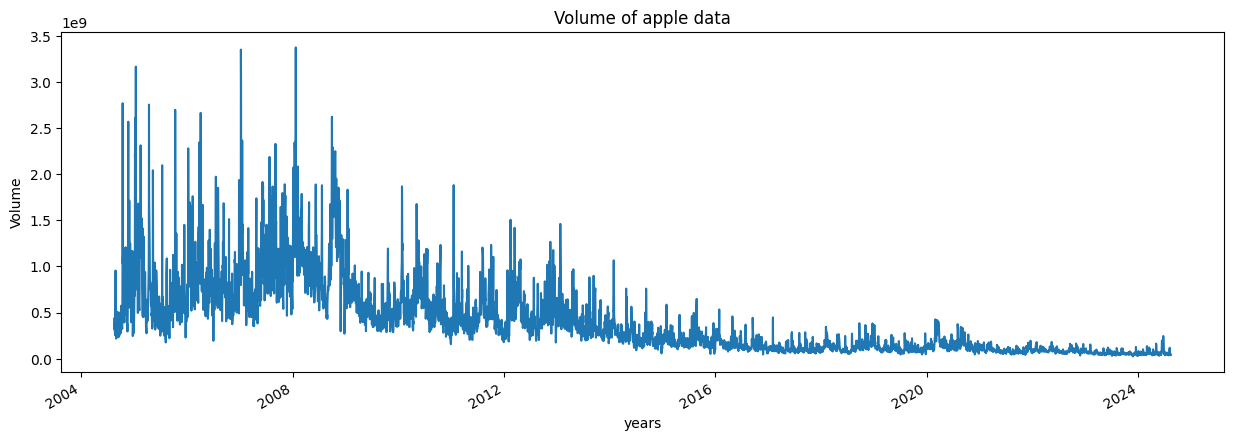

In [13]:
for column in apple_data.columns:
    plot_graph((15,5),apple_data[column], column)

## Simple list operation to calculate the average of some values

In [14]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


## Creating a DataFrame from a list and displaying the first few rows

In [15]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


## Calculating the moving average (MA) over 5 periods and adding it to the DataFrame

In [16]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


## Counting the number of records for each year in the data

In [17]:
for i in range(2004,2025):
    print(i,list(apple_data.index.year).count(i))

2004 97
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 155


## Calculating the 250-day moving average and adding it as a new column

In [18]:
apple_data['MA_for_250_days'] = apple_data['Adj Close'].rolling(250).mean()

## Displaying the last few rows of the moving average (MA) before day 250

In [19]:
apple_data['MA_for_250_days'][0:250].tail()

Date
2005-08-04         NaN
2005-08-05         NaN
2005-08-08         NaN
2005-08-09         NaN
2005-08-10    1.008174
Name: MA_for_250_days, dtype: float64

## Plotting the 250-day moving average

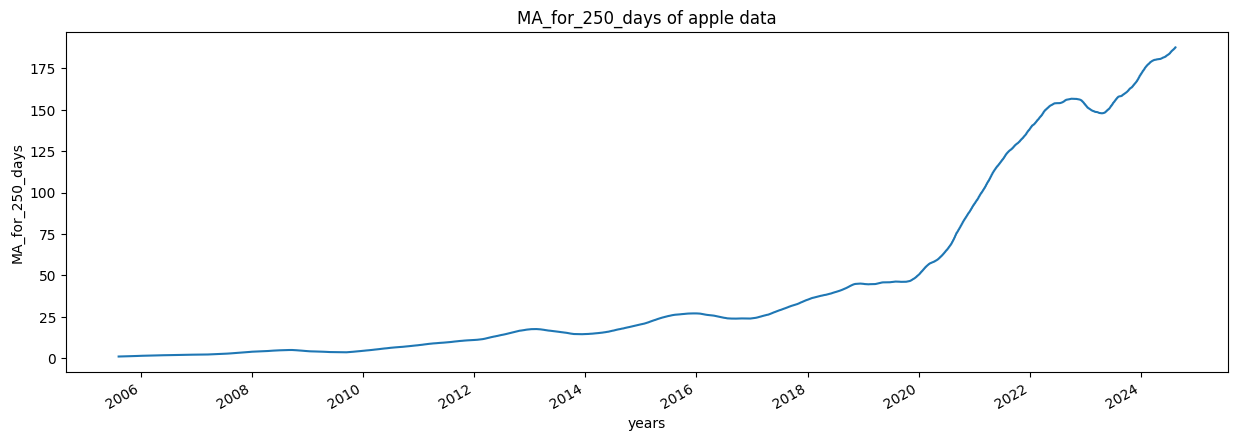

In [20]:
plot_graph((15,5), apple_data['MA_for_250_days'], 'MA_for_250_days')

## Plotting both adjusted close price and the 250-day moving average

<Figure size 640x480 with 0 Axes>

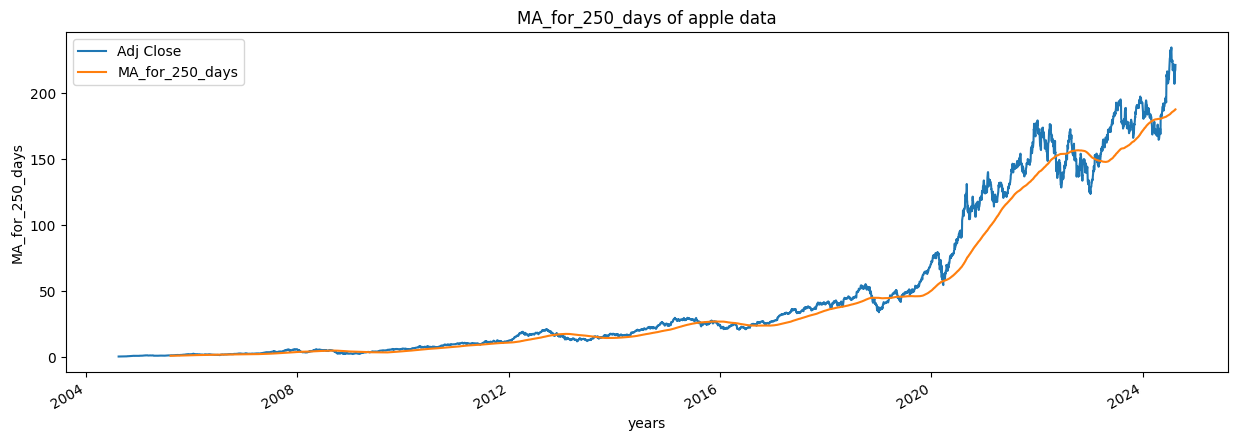

In [21]:
plot_graph((15,5), apple_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

## Calculating the 100-day moving average and plotting it along with adjusted close price

<Figure size 640x480 with 0 Axes>

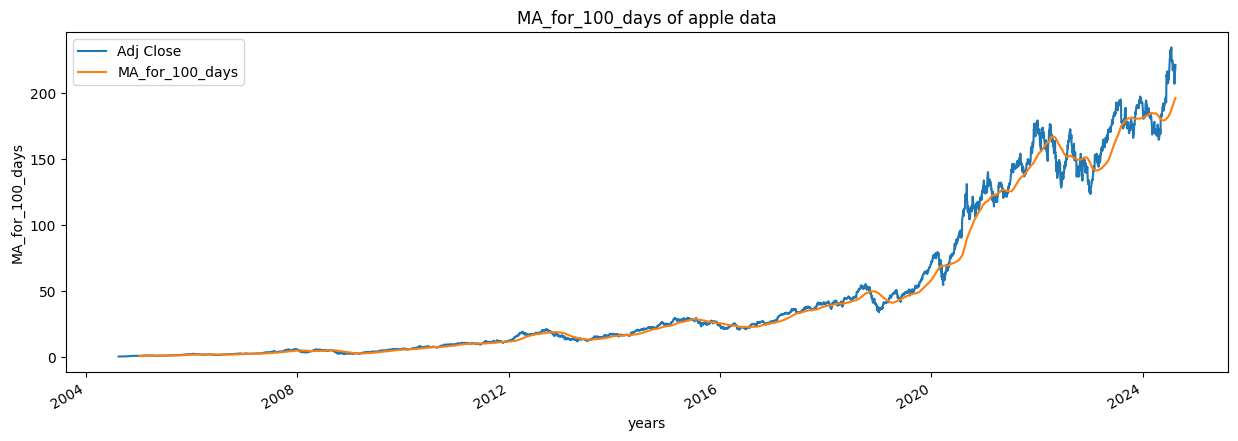

In [22]:
apple_data['MA_for_100_days'] = apple_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), apple_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

## Plotting the adjusted close price, 100-day MA, and 250-day MA together

<Figure size 640x480 with 0 Axes>

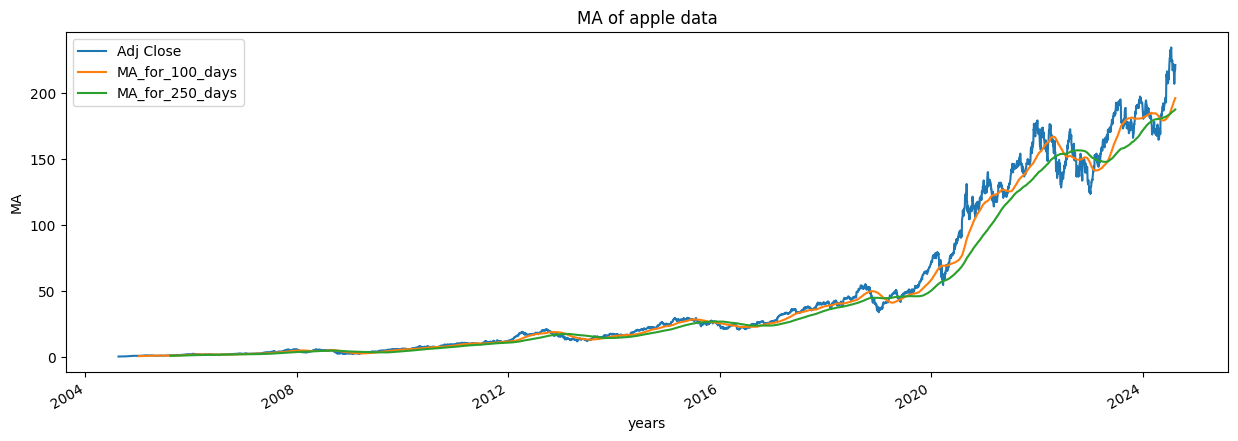

In [23]:
plot_graph((15,5), apple_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

## Calculating the percentage change in adjusted close price and adding it as a new column

In [24]:
apple_data['percentage_change_cp'] = apple_data['Adj Close'].pct_change()
apple_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-08-16,0.464160,NaN
2004-08-17,0.465517,0.002924
2004-08-18,0.478637,0.028183
2004-08-19,0.463104,-0.032451
2004-08-20,0.464462,0.002931


## Plotting the percentage change in adjusted close price

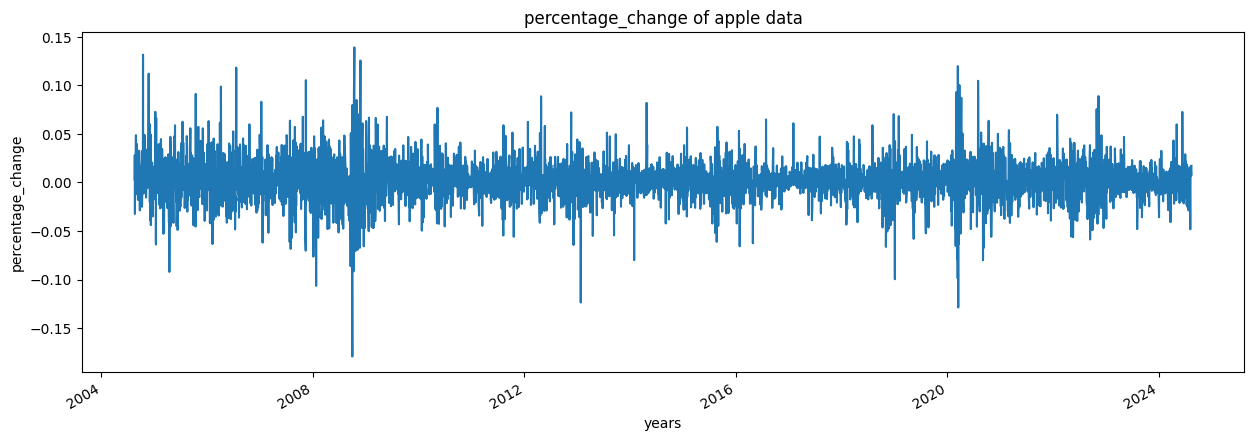

In [25]:
plot_graph((15,5), apple_data['percentage_change_cp'], 'percentage_change')

## Selecting only the adjusted close price for further processing

In [26]:
Adj_close_price = apple_data[['Adj Close']]

## Finding the maximum and minimum values in the adjusted close price

In [27]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([234.54852295]), array([0.46310428]))

## Scaling the data using MinMaxScaler for model training

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.50933024e-06],
       [1.03075862e-05],
       [6.63537015e-05],
       ...,
       [9.20719037e-01],
       [9.27297803e-01],
       [9.43274900e-01]])

## Checking the length of the scaled data

In [29]:
len(scaled_data)

5033

## Preparing data for LSTM by creating sequences of 100 time steps

In [30]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

## Displaying the first sequence and corresponding label

In [31]:
x_data[0],y_data[0]

(array([[4.50933024e-06],
        [1.03075862e-05],
        [6.63537015e-05],
        [0.00000000e+00],
        [5.79825594e-06],
        [2.38358315e-05],
        [7.98829653e-05],
        [1.50744087e-04],
        [2.54462375e-04],
        [2.34490647e-04],
        [2.19674876e-04],
        [2.43510071e-04],
        [3.31765070e-04],
        [3.18883197e-04],
        [2.91179697e-04],
        [3.25321714e-04],
        [3.63331273e-04],
        [3.21459011e-04],
        [3.32411060e-04],
        [3.14373739e-04],
        [3.07930639e-04],
        [2.89246818e-04],
        [3.63331273e-04],
        [4.14223213e-04],
        [4.50943591e-04],
        [4.70269583e-04],
        [4.00052160e-04],
        [4.22599193e-04],
        [4.23887355e-04],
        [4.39349116e-04],
        [4.72202717e-04],
        [5.13430006e-04],
        [5.17939973e-04],
        [5.12788344e-04],
        [5.20520116e-04],
        [5.57882156e-04],
        [6.39694817e-04],
        [5.73986597e-04],
        [5.3

## Calculating the splitting length for train and test data (80% for training)

In [32]:
int(len(x_data)*0.8)

3946

## Checking the length of test data after splitting


In [33]:
4908-100-int(len(x_data)*0.8)

862

## Splitting the data into training and testing sets

In [34]:
splitting_len = int(len(x_data)*0.8)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

## Displaying the shapes of the training and testing data

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3946, 100, 1)
(3946, 1)
(987, 100, 1)
(987, 1)


## Building the LSTM model with two LSTM layers and two Dense layers

In [37]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Scorpion\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compiling the model with mean squared error loss and Adam optimizer

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Training the model with the training data for 2 epochs

In [39]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 150s 37ms/step - loss: 5.2455e-04
Epoch 2/2
3946/3946 ━━━━━━━━━━━━━━━━━━━━ 166s 42ms/step - loss: 1.1089e-04


## Making predictions on the training and testing data

In [40]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


## Calculating the performance metrics (MSE, MAE, R^2) for the training data

In [41]:
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

## Calculating the performance metrics (MSE, MAE, R^2) for the testing data

In [42]:
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

## Printing the performance metrics for both training and testing data

In [43]:
print(f"Train MSE: {mse_train}, Train MAE: {mae_train}, Train R^2: {r2_train}")
print(f"Test MSE: {mse_test}, Test MAE: {mae_test}, Test R^2: {r2_test}")

Train MSE: 4.497497619348312e-05, Train MAE: 0.004725631741521278, Train R^2: 0.9940975452471996
Test MSE: 0.00133245446907416, Test MAE: 0.033651480057092904, Test R^2: 0.8951556125916854


## Displaying the summary of the LSTM model

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

## Making predictions on the testing data

In [45]:
predictions = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


## Displaying the predictions

In [46]:
predictions

array([[0.4586366 ],
       [0.4547133 ],
       [0.45012322],
       [0.45434734],
       [0.4586102 ],
       [0.45372775],
       [0.4453485 ],
       [0.43326014],
       [0.43272135],
       [0.43852323],
       [0.43369904],
       [0.43092266],
       [0.43774027],
       [0.44844002],
       [0.45271757],
       [0.4564408 ],
       [0.45976102],
       [0.45373365],
       [0.45547512],
       [0.4516021 ],
       [0.45242798],
       [0.45382655],
       [0.4587335 ],
       [0.47663307],
       [0.481755  ],
       [0.48135802],
       [0.4786664 ],
       [0.47345558],
       [0.46451962],
       [0.46260446],
       [0.46232018],
       [0.46065184],
       [0.45824933],
       [0.4569424 ],
       [0.45958525],
       [0.4511244 ],
       [0.45249873],
       [0.44264013],
       [0.43514693],
       [0.43526304],
       [0.44601208],
       [0.46176562],
       [0.47014132],
       [0.46743968],
       [0.4624768 ],
       [0.46629205],
       [0.46970448],
       [0.471

## Inversing the scaling transformation to get the original predictions

In [47]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[107.82325 ],
       [106.90486 ],
       [105.83039 ],
       [106.8192  ],
       [107.81707 ],
       [106.67416 ],
       [104.7127  ],
       [101.88299 ],
       [101.75687 ],
       [103.115   ],
       [101.985725],
       [101.335815],
       [102.93172 ],
       [105.43638 ],
       [106.43769 ],
       [107.30924 ],
       [108.08646 ],
       [106.67554 ],
       [107.08319 ],
       [106.176575],
       [106.3699  ],
       [106.69728 ],
       [107.84593 ],
       [112.03596 ],
       [113.234924],
       [113.142   ],
       [112.51193 ],
       [111.29215 ],
       [109.20038 ],
       [108.75207 ],
       [108.68552 ],
       [108.29499 ],
       [107.73259 ],
       [107.42666 ],
       [108.04531 ],
       [106.06475 ],
       [106.38646 ],
       [104.078705],
       [102.32466 ],
       [102.35184 ],
       [104.868034],
       [108.5557  ],
       [110.516335],
       [109.88392 ],
       [108.72218 ],
       [109.61528 ],
       [110.41408 ],
       [110.8

## Inversing the scaling transformation for the actual test data

In [48]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[110.90752411],
       [109.45142365],
       [112.73497009],
       [112.91087341],
       [109.57845306],
       [107.82920074],
       [104.40882874],
       [107.57511902],
       [109.2657547 ],
       [104.68245697],
       [105.75743103],
       [109.72505951],
       [112.34407043],
       [111.4938736 ],
       [113.17472839],
       [114.13244629],
       [110.4482193 ],
       [113.84902191],
       [110.58502197],
       [112.46134186],
       [112.35383606],
       [114.30833435],
       [121.56925201],
       [118.34433746],
       [118.43231201],
       [117.96321869],
       [116.31168365],
       [113.34087372],
       [114.83604431],
       [114.21060181],
       [113.11608887],
       [112.42224121],
       [112.43201447],
       [113.94676208],
       [108.66962433],
       [112.6958847 ],
       [106.38288116],
       [106.29491425],
       [107.92694092],
       [112.33428192],
       [116.32144928],
       [116.18930054],
       [113.86923218],
       [113

## Calculating the Root Mean Square Error (RMSE) for the test data

In [49]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

## Displaying the RMSE value

In [50]:
rmse

8.544777061846702

## Creating a DataFrame to compare original test data and predictions

In [51]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = apple_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2020-09-10,110.907524,107.823250
2020-09-11,109.451424,106.904861
2020-09-14,112.734970,105.830391
2020-09-15,112.910873,106.819199
2020-09-16,109.578453,107.817070


## Plotting the original test data and predictions

<Figure size 640x480 with 0 Axes>

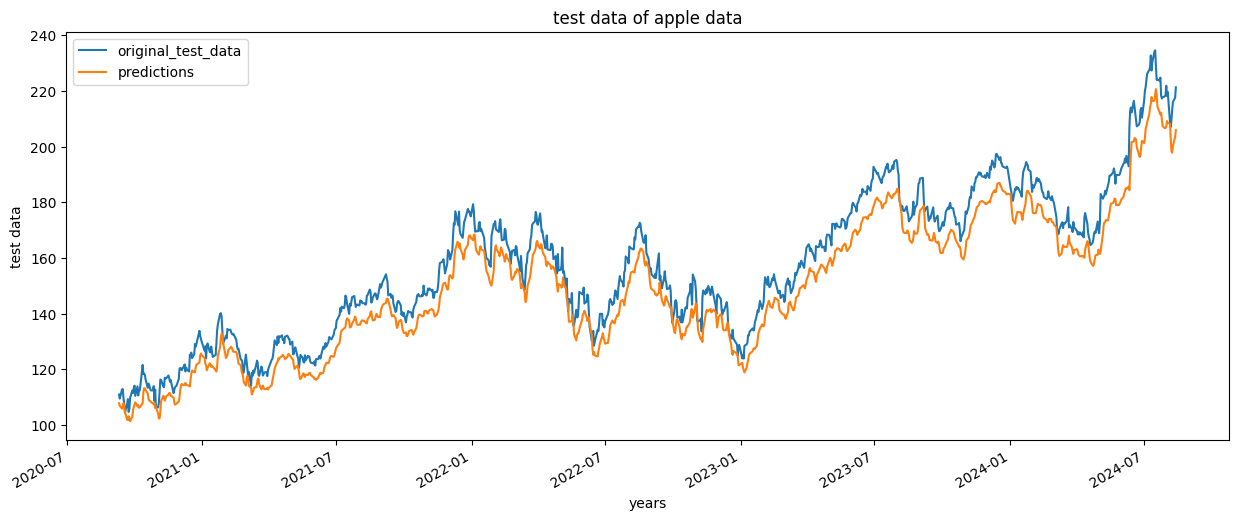

In [52]:
plot_graph((15,6), ploting_data, 'test data')

## Plotting the whole data including both training and test data with predictions

<Figure size 640x480 with 0 Axes>

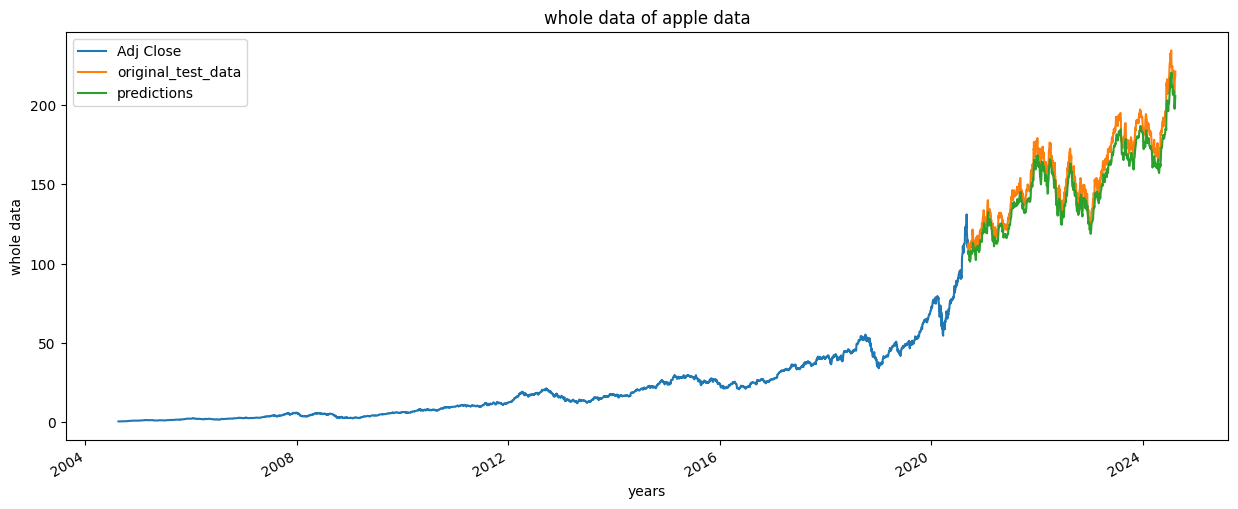

In [53]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

## Saving the trained model for future use

In [54]:
model.save("Latest_stock_price_prediction.keras")